## Project Outline
      project website : https://www.konga.com/category/men-s-shoes-1527?page=
      project idea : To  obtain the details of men's footwears on the site
      ShoeData : ShoeName, ShoeColour, ShoePrice and SoldBy

## Importing the Selenium and requests library to download webpages

In [1]:
import requests

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [3]:
driver = webdriver.Chrome(executable_path='C:\\Users\\Igwe\\Downloads\\chromedriver_win32\\chromedriver.exe')

## Scrapping Page 1 of konga.com/category/men-s-shoes

In [4]:
base_url = 'https://www.konga.com/category/men-s-shoes-1527?page='
driver.get(base_url)

## Using Beautiful Soup library to parse and extract information

In [5]:
from bs4 import BeautifulSoup as bs 

In [6]:
html = driver.page_source
soup = bs(html,'lxml')

In [7]:
fullData = soup.find('section',{'class':'_588b5_3MtNs'})

In [8]:
detailData = fullData.find_all('li',{'class':'bbe45_3oExY _22339_3gQb9'})

In [9]:
len(detailData)

20

In [10]:
ShoeData = []
for i in range(len(detailData)):
    ShoeName = detailData[i].find('h3').text
    try:
        ActualPrice = detailData[i].find('span',{'class':'f6eb3_1MyTu'}).text.lstrip('₦').replace(',','')
    except:
        ActualPrice = 'na'
    
    try:
        DiscountPrice = detailData[i].find('span',{'class':'d7c0f_sJAqi'}).text.lstrip('₦').replace(',','')
    except:
         DiscountPrice = 'na'
    SoldBy = detailData[i].find('span',{'class':'_7cc7b_23GsY'}).text
    ShoeData.append([ShoeName, ActualPrice, DiscountPrice, SoldBy ])

In [11]:
type(ActualPrice)

str

In [12]:
type( DiscountPrice)

str

In [13]:
ShoeData

[["Men's Sneakers", '25000', '22490', 'Sold by  eluss'],
 ["Bolun Men's Leather Formal Shoes...",
  '9500',
  '7500',
  'Sold by  affordablefoots'],
 ["Men's Sneakers - Black", '10000', '8000', 'Sold by  digiconnect'],
 ["MAC Men's Half Shoe - Black", 'na', '8800', 'Sold by  macfedo'],
 ["Men's Sneakers- Black", '20000', '16000', 'Sold by  buchyventures'],
 ["Men's Casual Shoes Loafers Shoes...",
  '8000',
  '5000',
  'Sold by  divine vendor store'],
 ["Men's Rugged Lace Up Sneakers",
  'na',
  '5120',
  'Sold by  morgan scott footwears'],
 ['Fashion House 2021 Luxury Suede ...',
  '16000',
  '12500',
  "Sold by  general's store"],
 ['Men Corporate Patent Shoe - Blac...',
  'na',
  '7000',
  'Sold by  buolawe store'],
 ['Unisex High Quality Flip Flops S...',
  '3000',
  '1500',
  'Sold by  ebenezer eletronics'],
 ["Men's Loafers Shoes", '8000', '5000', 'Sold by  divine vendor store'],
 ["adidas Men's Beach Slide In - Gr...",
  '19000',
  '5500',
  'Sold by  de jersey boss'],
 ['Smart B

## Using Pandas to Analysis Data

In [14]:
import pandas as pd

In [15]:
ShoeData_df = pd.DataFrame(columns=['ShoeName','ActualPrice','DiscountPrice','SoldBy'], data = ShoeData)

In [16]:
ShoeData_df

,ShoeName,ActualPrice,DiscountPrice,SoldBy
0,Men's Sneakers,25000,22490,Sold by eluss
1,Bolun Men's Leather Formal Shoes...,9500,7500,Sold by affordablefoots
2,Men's Sneakers - Black,10000,8000,Sold by digiconnect
3,MAC Men's Half Shoe - Black,na,8800,Sold by macfedo
4,Men's Sneakers- Black,20000,16000,Sold by buchyventures
5,Men's Casual Shoes Loafers Shoes...,8000,5000,Sold by divine vendor store
6,Men's Rugged Lace Up Sneakers,na,5120,Sold by morgan scott footwears
7,Fashion House 2021 Luxury Suede ...,16000,12500,Sold by general's store
8,Men Corporate Patent Shoe - Blac...,na,7000,Sold by buolawe store
9,Unisex High Quality Flip Flops S...,3000,1500,Sold by ebenezer eletronics


In [17]:
ShoeData_df.head()

,ShoeName,ActualPrice,DiscountPrice,SoldBy
0,Men's Sneakers,25000,22490,Sold by eluss
1,Bolun Men's Leather Formal Shoes...,9500,7500,Sold by affordablefoots
2,Men's Sneakers - Black,10000,8000,Sold by digiconnect
3,MAC Men's Half Shoe - Black,na,8800,Sold by macfedo
4,Men's Sneakers- Black,20000,16000,Sold by buchyventures


In [18]:
ShoeData_df.tail()

,ShoeName,ActualPrice,DiscountPrice,SoldBy
15,Fashion Hut Men's Sneakers - Bla...,7000,6500,Sold by jessy store
16,Men's Sneakers - Black,na,7500,Sold by richardson
17,Men's Flexible Sneakers - Black...,10000,4000,Sold by doyin
18,Clarks Glevo Fly Black Men's Lea...,45000,35000,Sold by joots internationale
19,Men's Classic Shoe - Black,na,8700,Sold by buolawe store


## Creating a CSV File SHOEDATA

In [19]:
ShoeData_df.to_csv('SHOEDATA OF PAGE1.csv',index = None)



## Reading a CSV File SHOEDATA

In [20]:
SHOEDATA = pd.read_csv("SHOEDATA OF PAGE1.csv")

## Dropping the 'na' values on the DataFrame

In [21]:
SHOEDATA['ActualPrice'] = SHOEDATA['ActualPrice'].replace('na',0)

In [22]:
SHOEDATA

,ShoeName,ActualPrice,DiscountPrice,SoldBy
0,Men's Sneakers,25000,22490,Sold by eluss
1,Bolun Men's Leather Formal Shoes...,9500,7500,Sold by affordablefoots
2,Men's Sneakers - Black,10000,8000,Sold by digiconnect
3,MAC Men's Half Shoe - Black,0,8800,Sold by macfedo
4,Men's Sneakers- Black,20000,16000,Sold by buchyventures
5,Men's Casual Shoes Loafers Shoes...,8000,5000,Sold by divine vendor store
6,Men's Rugged Lace Up Sneakers,0,5120,Sold by morgan scott footwears
7,Fashion House 2021 Luxury Suede ...,16000,12500,Sold by general's store
8,Men Corporate Patent Shoe - Blac...,0,7000,Sold by buolawe store
9,Unisex High Quality Flip Flops S...,3000,1500,Sold by ebenezer eletronics


## Pandas Data Cleaning
     
     Cleaning up the SHOEDATA.CSV by filling the null values with zero(0)
     
     Converting the format of ActualPrice and DiscountPrice fro string to int values using .astype()
     

In [23]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np

## Converting the string number values to int values

In [25]:
SHOEDATA['ActualPrice'] =SHOEDATA['ActualPrice'].astype(int)

In [26]:
SHOEDATA['DiscountPrice'] =SHOEDATA['DiscountPrice'].astype(int)

In [27]:
SHOEDATA

,ShoeName,ActualPrice,DiscountPrice,SoldBy
0,Men's Sneakers,25000,22490,Sold by eluss
1,Bolun Men's Leather Formal Shoes...,9500,7500,Sold by affordablefoots
2,Men's Sneakers - Black,10000,8000,Sold by digiconnect
3,MAC Men's Half Shoe - Black,0,8800,Sold by macfedo
4,Men's Sneakers- Black,20000,16000,Sold by buchyventures
5,Men's Casual Shoes Loafers Shoes...,8000,5000,Sold by divine vendor store
6,Men's Rugged Lace Up Sneakers,0,5120,Sold by morgan scott footwears
7,Fashion House 2021 Luxury Suede ...,16000,12500,Sold by general's store
8,Men Corporate Patent Shoe - Blac...,0,7000,Sold by buolawe store
9,Unisex High Quality Flip Flops S...,3000,1500,Sold by ebenezer eletronics


## Pandas Analysis on the DataFrame SHOEDATA

In [28]:
SHOEDATA.corr()

,ActualPrice,DiscountPrice
ActualPrice,1.000000,0.842626
DiscountPrice,0.842626,1.000000


In [29]:
SHOEDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ShoeName       20 non-null     object
 1   ActualPrice    20 non-null     int32 
 2   DiscountPrice  20 non-null     int32 
 3   SoldBy         20 non-null     object
dtypes: int32(2), object(2)
memory usage: 608.0+ bytes


## From the Shoedata below, it shows that there are 7 shoes without ActualPrice

In [30]:
SHOEDATA['ActualPrice'].value_counts()

0        7
10000    2
8000     2
16000    1
7000     1
25000    1
6000     1
45000    1
3000     1
20000    1
9500     1
19000    1
Name: ActualPrice, dtype: int64

## From the ShoeData below, It shows that the shoe pairs with the highest discount Price

In [31]:
SHOEDATA['DiscountPrice'].value_counts()

5000     2
7500     2
8000     1
8499     1
1500     1
5500     1
22490    1
7000     1
8700     1
12500    1
35000    1
5699     1
5120     1
3700     1
8800     1
6500     1
16000    1
4000     1
Name: DiscountPrice, dtype: int64

## Providing the statistics data of the ShoeData 

In [32]:
SHOEDATA_AGG = SHOEDATA.agg(
     {
            "ActualPrice": ["min", "max", "median", "skew"],
            "DiscountPrice": ["min", "max", "median", "mean"],
       }
   )

In [33]:
SHOEDATA_AGG

,ActualPrice,DiscountPrice
min,0.000000,1500.0
max,45000.000000,35000.0
median,7500.000000,7250.0
skew,1.835929,NaN
mean,NaN,9200.4


In [34]:
SHOEDATA[["DiscountPrice", "ActualPrice"]].describe()

,DiscountPrice,ActualPrice
count,20.000000,20.000000
mean,9200.400000,9325.000000
std,7657.465909,11332.620592
min,1500.000000,0.000000
25%,5090.000000,0.000000
50%,7250.000000,7500.000000
75%,8725.000000,11500.000000
max,35000.000000,45000.000000


## Data Virtualization of the DataFrame
  using Pandas built-in virtualization tools, matplotlib, seaborn virtuals

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
import seaborn as sns

## Representing the DataFrame Description in a Histogram

array([[<AxesSubplot:title={'center':'DiscountPrice'}>,
        <AxesSubplot:title={'center':'ActualPrice'}>]], dtype=object)

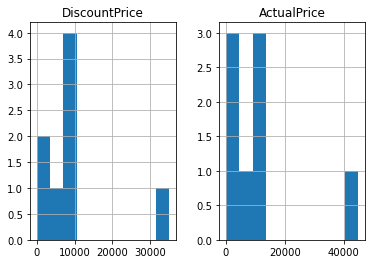

In [43]:
SHOEDATA[["DiscountPrice", "ActualPrice"]].describe().hist()

## Representing the DataFrame Aggregate Values in a Histogram

array([[<AxesSubplot:title={'center':'ActualPrice'}>,
        <AxesSubplot:title={'center':'DiscountPrice'}>]], dtype=object)

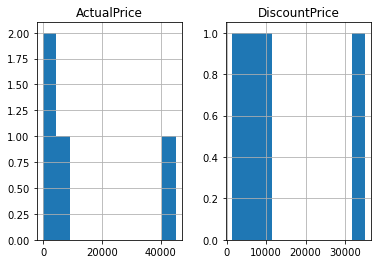

In [44]:
SHOEDATA_AGG.hist()

## Representing the DiscountPrice in a Histogram

<AxesSubplot:>

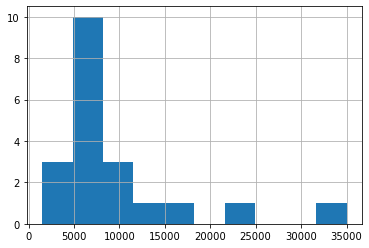

In [45]:
SHOEDATA["DiscountPrice"].hist()

## Representing the ActualPrice in a Histogram

<AxesSubplot:>

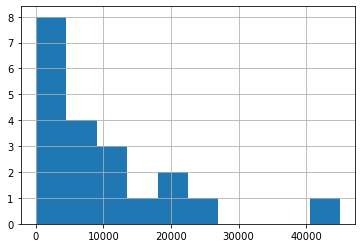

In [46]:
SHOEDATA["ActualPrice"].hist()